In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
program_spending = pd.read_excel('../data/tn_children_served.xlsx')

In [4]:
program_spending.head()

,Year,County_District,Region,Agency_ID,Agency_Name,Program_Name,County_and_State,Calculation_Method,Children Served,Expenditure,Expenditure per Child
0,2019,Madison,West,DMHSAS,Department of Mental Health and Substance Abus...,A Mother's Love (Pregnant Women's Program),"Madison, Tennessee",Actual,1.0,22682.0,22682.000
1,2020,Madison,West,DMHSAS,Department of Mental Health and Substance Abus...,A Mother's Love (Pregnant Women's Program),"Madison, Tennessee",Actual,2.0,71375.0,35687.500
2,2018,Madison,West,DMHSAS,Department of Mental Health and Substance Abus...,A Mother's Love (Pregnant Women's Program),"Madison, Tennessee",Actual,2.0,84403.0,42201.500
3,2016,Davidson,Middle,AOC,Administrative Office of the Courts,Access and Visitation Grant,"Davidson, Tennessee",Estimate,375.0,NaN,NaN
4,2020,Union,East,DOE,Department of Education,Admin - LEAPs - Lottery for Education: Afterschoo,"Union, Tennessee",Actual,8.0,13275.0,1659.375


In [7]:
program_spending['Program_Name'].unique()

array(["A Mother's Love (Pregnant Women's Program)",
       'Access and Visitation Grant',
       'Admin - LEAPs - Lottery for Education: Afterschoo',
       'Administration-Title I Part A School Improvement',
       'Adoption - Support Services',
       'Agency for Youth and Family Development', 'AIDS Prevention',
       'AmeriCorps VISTA/National/State', 'Artist-in-Residence (AE-AR)',
       'Arts Integration (AE-AI)', 'Arts360', 'AWARE',
       'Basic Education Program (BEP)',
       'Bedford County Schools - LEAPs - Lottery for Educ',
       'Better Attitudes and Skills In Children (B.A.S.I.',
       'Boys & Girls Club of the Hatchie River',
       'Boys & Girls Club of the Mountain Empir',
       'Boys & Girls Clubs of the Tennessee Valley FFG',
       'Boys & Girls Clubs Project Learn',
       'Building Strong Families in Rural Tennessee',
       'C&Y Homeless Outreach', 'Caregiver Engagement 0-5',
       'Caregiver Engagement K-3', 'CCTE AP/SIC Grant',
       'CCTE Early Postsec

Food Stamp Benefits/SNAP

In [6]:
program_spending['Agency_Name'].unique()

array(['Department of Mental Health and Substance Abuse Services',
       'Administrative Office of the Courts', 'Department of Education',
       "Department of Children's Services", 'Department of Health',
       'Tennessee Department of Health', 'AmeriCorps 2020 Report',
       'Tennessee Arts Commission', 'TN Arts Commission',
       'Tennessee Commission on Children and Youth',
       "Governor's Early Literacy Foundation",
       'Department of Human Services',
       "Governor's Books from Birth Foundation",
       'Tennessee Higher Education Commission',
       'Office of Criminal Justice Programs',
       'Department of Economic and Community Development',
       'TN State Museum', 'Tennessee State Museum',
       'Department of Intellectual and Developmental Disabilities',
       'Tennessee Housing Development Agency', 'Volunteer TN', nan],
      dtype=object)

In [ ]:
# program_spending.groupby('Year')[]

In [34]:
SNAP_spending = program_spending[program_spending['Program_Name'].str.contains('Food Stamp Benefits', na=False)]
SNP_spending = program_spending[program_spending['Program_Name'].str.contains('SNP ', na=False)]

In [43]:
food_program_spending = pd.concat([SNAP_spending, SNP_spending])

In [35]:
SNP_spending.head()

,Year,County_District,Region,Agency_ID,Agency_Name,Program_Name,County_and_State,Calculation_Method,Children Served,Expenditure,Expenditure per Child
19283,2021,Hawkins,East,DOE,Department of Education,SNP Afterschool Snack Program,"Hawkins, Tennessee",Estimate,16.0,513.0,32.062500
19284,2017,Chester,West,DOE,Department of Education,SNP Afterschool Snack Program,"Chester, Tennessee",Estimate,58.0,1049.0,18.086207
19285,2015,Hawkins,East,DOE,Department of Education,SNP Afterschool Snack Program,"Hawkins, Tennessee",Estimate,18.0,1109.0,61.611111
19286,2016,Chester,West,DOE,Department of Education,SNP Afterschool Snack Program,"Chester, Tennessee",Estimate,45.0,1409.0,31.311111
19287,2015,Clay,Middle,DOE,Department of Education,SNP Afterschool Snack Program,"Clay, Tennessee",Estimate,22.0,1544.0,70.181818


In [12]:
SNAP_spending.info()

<class 'pandas.core.frame.DataFrame'>
Index: 760 entries, 13312 to 14071
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   760 non-null    object 
 1   County_District        760 non-null    object 
 2   Region                 760 non-null    object 
 3   Agency_ID              760 non-null    object 
 4   Agency_Name            760 non-null    object 
 5   Program_Name           760 non-null    object 
 6   County_and_State       760 non-null    object 
 7   Calculation_Method     760 non-null    object 
 8   Children Served        760 non-null    float64
 9    Expenditure           95 non-null     float64
 10  Expenditure per Child  95 non-null     float64
dtypes: float64(3), object(8)
memory usage: 71.2+ KB


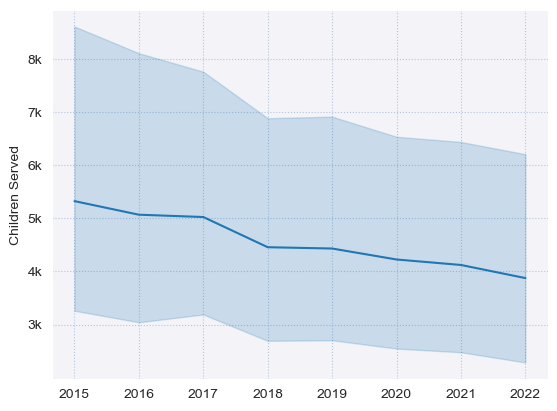

In [24]:
ax = sns.lineplot(SNAP_spending, x='Year',y='Children Served')
sns.set_style("darkgrid", {"grid.color": "lightsteelblue", "grid.linestyle": ":"})
ax.patch.set_alpha(0.5)
# sns.set_palette("dark:#5A9_r")
# plt.title('Children Served Through SNAP by Year')
plt.ylabel('Children Served')
ax.set(xlabel=None)
plt.yticks([3000,4000,5000,6000,7000,8000],['3k','4k','5k','6k','7k','8k'])
# plt.savefig('SNAP_kids_by_year.png', transparent=True)

([<matplotlib.axis.YTick at 0x128274b1810>,
 [Text(0, 4000, '4k'),
  Text(0, 6000, '6k'),
  Text(0, 8000, '8k'),
  Text(0, 10000, '10k'),
  Text(0, 12000, '12k'),
  Text(0, 14000, '14k')])

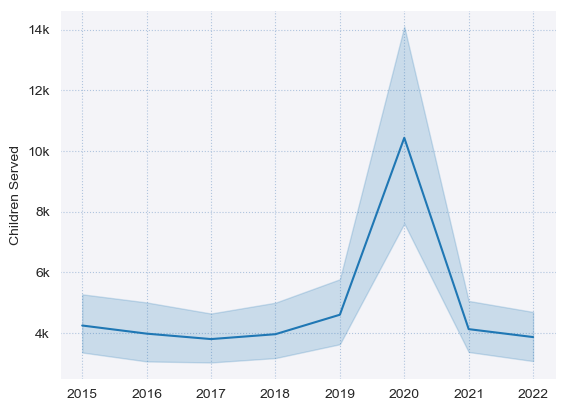

In [60]:
ax = sns.lineplot(food_program_spending, x='Year',y='Children Served')
sns.set_style("darkgrid", {"grid.color": "lightsteelblue", "grid.linestyle": ":"})
ax.patch.set_alpha(0.5)
# sns.set_palette("dark:#5A9_r")
# plt.title('Children Served Through SNAP by Year')
plt.ylabel('Children Served')
ax.set(xlabel=None)
plt.yticks([4000,6000,8000, 10000,12000,14000],['4k','6k','8k','10k','12k','14k'])
plt.savefig('SNAP_kids_by_year_1.png', transparent=True)

In [25]:
sorted_program_spending = program_spending.sort_values(by='Children Served', ascending=False)

In [26]:
sorted_program_spending.head(50)

,Year,County_District,Region,Agency_ID,Agency_Name,Program_Name,County_and_State,Calculation_Method,Children Served,Expenditure,Expenditure per Child
21391,2020,Shelby,West,DOE,Department of Education,SNP School Breakfast Program,"Shelby, Tennessee",Estimate,426823.0,14880689.0,34.863841
10701,2019,Shelby,West,DOE,Department of Education,"ESSA-Title II, Part A - Improving Teacher Quality","Shelby, Tennessee",Estimate,291614.0,7148509.0,24.513600
21383,2020,Davidson,Middle,DOE,Department of Education,SNP School Breakfast Program,"Davidson, Tennessee",Estimate,272092.0,8418156.0,30.938638
10696,2019,Davidson,Middle,DOE,Department of Education,"ESSA-Title II, Part A - Improving Teacher Quality","Davidson, Tennessee",Estimate,195745.0,3472298.0,17.738885
8819,2017,Shelby,West,DOE,Department of Education,"ESEA-Title I, Part A - Improving Acad. Achieve...","Shelby, Tennessee",Actual,192325.0,74998867.0,389.959012
8818,2016,Shelby,West,DOE,Department of Education,"ESEA-Title I, Part A - Improving Acad. Achieve...","Shelby, Tennessee",Actual,189176.0,69885753.0,369.421877
5418,2015,Knox,East,DMHSAS,Department of Mental Health and Substance Abus...,Community Anti-Drug Coalitions (including Partner,"Knox, Tennessee",Estimate,185677.0,224999.0,1.211776
8817,2015,Shelby,West,DOE,Department of Education,"ESEA-Title I, Part A - Improving Acad. Achieve...","Shelby, Tennessee",Actual,177961.0,65075028.0,365.670164
9204,2015,Shelby,West,DOE,Department of Education,ESEA-Title II-A-Teacher Quality,"Shelby, Tennessee",Actual,174191.0,7091532.0,40.711242
9015,2017,Shelby,West,DOE,Department of Education,"ESEA-Title II, Part A - Improving Teacher Quality","Shelby, Tennessee",Actual,172420.0,7127121.0,41.335814


In [31]:
sorted_program_spending_top = sorted_program_spending.head(50)

C:\Users\Owner\AppData\Local\Temp\ipykernel_4956\3706245022.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=food_program_spending, x='Children Served',y='Program_Name',hue='Year', ci=None)


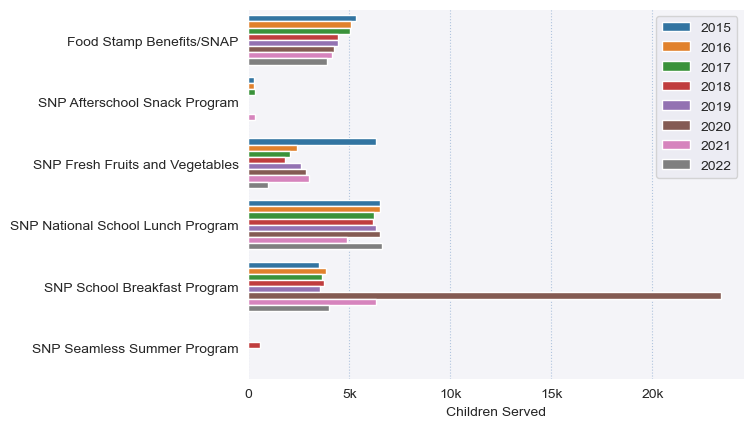

In [56]:
ax = sns.barplot(data=food_program_spending, x='Children Served',y='Program_Name',hue='Year', ci=None)
sns.set_style("darkgrid", {"grid.color": "lightsteelblue", "grid.linestyle": ":"})
ax.patch.set_alpha(0.5)
plt.legend(loc='upper right')
ax.set(ylabel=None)
# plt.yticks(['SNP Seamless Summer Program','SNP School Breakfast Program','SNP National School Lunch Program', 'SNP Fresh Fruits and Vegetables','SNP Afterschool Snack Program','Food Stamp Benefits/SNAP'],['Seamless Summer','School Breakfast','School Lunch','Fruits & Veggies','After School Snacks', 'SNAP'])
plt.xticks([0,5000,10000,15000,20000],['0','5k','10k','15k','20k'])
plt.savefig('SNAP_program_spending_yearly_1.png', transparent=True,  bbox_inches='tight')